# Detección de manos

MediaPipe incluye un modelo para la predicción del movimiento y articulación de las manos. Este modelo puede ser utilizado para implementar distintos niveles de interacción a través de una cámara.

El modelo de inferencia detecta 21 marcadores de la mano a través de un pipelines con múltiples modelos trabajando de manera conjunta.
Primero se cuenta con un detector de palmas sobre toda la imagen, posteriormente, un modelo de predicción de marcadores procesa la región con la palma. La estrategia es similar a la detección de marcadores faciales observada anteriormente.

 - **Detección de palmas**: se basa en una red de detección SSD optimizada. El modelo es capaz de detectar palmas incluso en distintos niveles de oclusión.
 - **Detección de marcadores**: Se utiliza un modelo de regresión que predice la localización de 21 marcadores de una mano. Se utilizan los siguientes marcadores:

 ![marcadores](hand_landmarks.png)

In [7]:
import cv2
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [18, 8]    # incrementar tamaño de plots

MODEL_PATH = "models/hand_landmarker.task"
base_options = python.BaseOptions(model_asset_path=MODEL_PATH)
options = vision.HandLandmarkerOptions(base_options=base_options,
                                       num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

I0000 00:00:1717809484.061139 11032177 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 88.1), renderer: Apple M1 Pro
W0000 00:00:1717809484.067200 11033914 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1717809484.073010 11033917 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [8]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np

MARGIN = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
HANDEDNESS_TEXT_COLOR = (88, 205, 54) # vibrant green

def draw_landmarks_on_image(rgb_image, detection_result):
  hand_landmarks_list = detection_result.hand_landmarks
  handedness_list = detection_result.handedness
  if rgb_image.shape[-1] > 3:
    rgb_image = rgb_image[:,:,:3]
  annotated_image = np.copy(rgb_image)
  print(type(rgb_image), rgb_image.shape)
  # Loop through the detected hands to visualize.
  for idx in range(len(hand_landmarks_list)):
    hand_landmarks = hand_landmarks_list[idx]
    handedness = handedness_list[idx]

    # Draw the hand landmarks.
    hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    hand_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      hand_landmarks_proto,
      solutions.hands.HAND_CONNECTIONS,
      solutions.drawing_styles.get_default_hand_landmarks_style(),
      solutions.drawing_styles.get_default_hand_connections_style())

    # Get the top left corner of the detected hand's bounding box.
    height, width, _ = annotated_image.shape
    x_coordinates = [landmark.x for landmark in hand_landmarks]
    y_coordinates = [landmark.y for landmark in hand_landmarks]
    text_x = int(min(x_coordinates) * width)
    text_y = int(min(y_coordinates) * height) - MARGIN

    # Draw handedness (left or right hand) on the image.
    cv2.putText(annotated_image, f"{handedness[0].category_name}",
                (text_x, text_y), cv2.FONT_HERSHEY_DUPLEX,
                FONT_SIZE, HANDEDNESS_TEXT_COLOR, FONT_THICKNESS, cv2.LINE_AA)

  return annotated_image

In [9]:
def display_color_row(*imgs):
    for i, img in enumerate(imgs):
        print(type(img), img.dtype, img[0,0])
        plt.subplot(1, len(imgs), i + 1)
        plt.imshow(img)
        plt.title(f"{i}")
        plt.xticks([])
        plt.yticks([])

<class 'mediapipe.python._framework_bindings.image.Image'>
time: 45.14[ms]
<class 'numpy.ndarray'> (434, 650, 3)
<class 'numpy.ndarray'> uint8 [180 147 114]


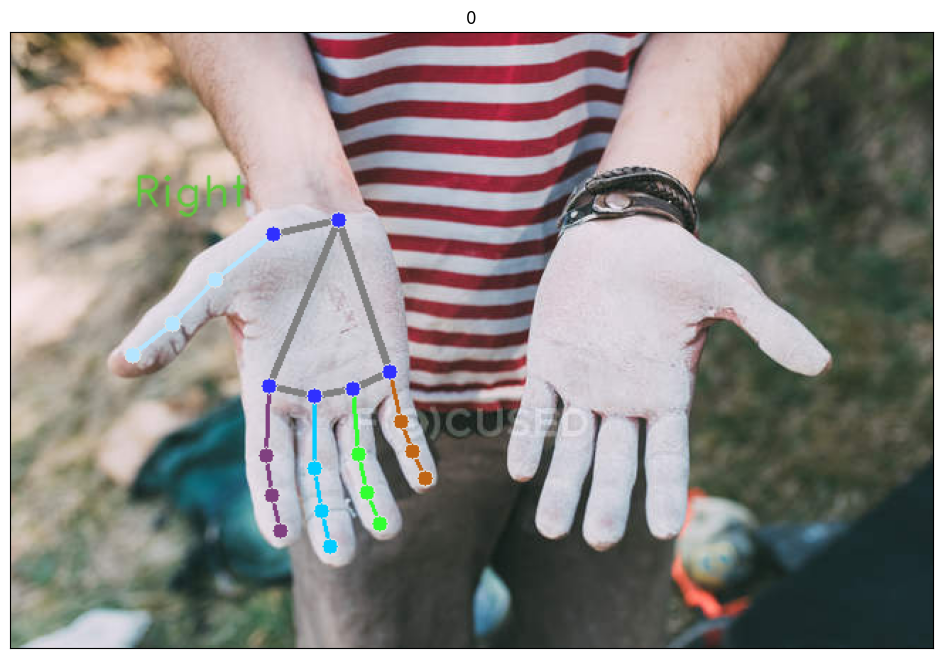

In [13]:
import time
image = mp.Image.create_from_file("hands2.jpg")
print(type(image))
start_time = time.time()
detection_result = detector.detect(image)
print(f"time: {(time.time() - start_time)*1000:.2f}[ms]")
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)

display_color_row( annotated_image)

In [11]:
detection_result

HandLandmarkerResult(handedness=[[Category(index=0, score=0.9652273058891296, display_name='Right', category_name='Right')], [Category(index=0, score=0.9043908715248108, display_name='Right', category_name='Right')]], hand_landmarks=[[NormalizedLandmark(x=0.28328612446784973, y=0.6341245770454407, z=7.476710379705764e-07, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.32419681549072266, y=0.5981455445289612, z=-0.03752383962273598, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.36127275228500366, y=0.5548340082168579, z=-0.061051953583955765, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.4072970449924469, y=0.5483472347259521, z=-0.08202087134122849, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.4509430527687073, y=0.5543820858001709, z=-0.10446316003799438, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.3177015781402588, y=0.41753700375556946, z=-0.05166850611567497, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.3389959931373596, y=0.324786